# **Exploring Exoplanets with TESS Data and Lightkurve**

In this tutorial, we will explore exoplanet detection using data from Transiting Exoplanet Survey Satellite[(TESS)](https://tess.mit.edu/) and the [*Lightkurve*](https://docs.lightkurve.org/index.html) library. This guide will walk you through the process of accessing, analyzing, and visualizing TESS data to identify potential exoplanet candidates.

The guide was prepared by Paridhi Jain for Intro-2-Astro 2024 and is being re-utilised for 2025 by Chetan Chawla.

## Imports

Packages that we would need:
- [**Lightkurve**](https://docs.lightkurve.org/index.html) to access and work with *TESS* data (v2.0.1)
- [**Matplotlib**](https://matplotlib.org/) for plotting.

In [1]:
#This cell simply imports the modules that you need for the work in this notebook
#%matplotlib inline #uncomment when using jupiter notebook
import lightkurve as lk
import matplotlib.pyplot as plt

## Introduction

A light curve is a plot of flux versus time, and is used to identify variability, including the transits of orbiting companions like planets. We would load and plot the contents of a TESS light curve (lc) file. We will plot the flux timeseries contained within the file.

This tutorial will refer to a couple TESS-related terms that we define here.
* TIC ID = An identifier in the TESS Input Catalog (TIC)
* Sector = TESS observed the sky in regions of 24x96 degrees along the southern, then northern, ecliptic hemispheres.  Each of these regions is referred to as a "sector", starting with Sector 1.
* BJD = Barycentric Julian Date, the Julian Date that has been corrected for differences in the Earth's position with respect to the Solar System center of mass.
* TBJD = TESS Barycentric Julian Date, the timestamp measured in BJD, but offset by 2457000.0.  I.e., TBJD = BJD - 2457000.0
* Flux: The amount of light received from a star, measured over a certain period of time.
* Normalized flux: The flux measurement that has been adjusted to a common reference, typically by dividing by the median or mean flux value to remove instrumental effects and allow for easier comparison of light curves.

## 1. Accessing the data product:

Lightkurve provides several functions to search for and download observations from Kepler/K2 and TESS. It accesses the data from the [MAST](https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.htmlhttps://) archive. To obtain light curve files for your object of interest you can use [`search_lightcurve()`](https://docs.lightkurve.org/reference/api/lightkurve.search_lightcurve.html?highlight=search_lightcurve)


In [2]:
#define TIC e.g. TIC 266980320
TIC = 'TIC 284475976' #Confirmed Planet WASP-48b
#search what data is available for a given target
sector_data = lk.search_lightcurve(TIC)
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0
1,TESS Sector 26,2020,SPOC,120,284475976,0.0
2,TESS Sector 41,2021,SPOC,120,284475976,0.0
3,TESS Sector 40,2021,SPOC,120,284475976,0.0
4,TESS Sector 60,2022,SPOC,20,284475976,0.0
5,TESS Sector 56,2022,SPOC,20,284475976,0.0
6,TESS Sector 56,2022,SPOC,120,284475976,0.0
7,TESS Sector 60,2022,SPOC,120,284475976,0.0
8,TESS Sector 54,2022,SPOC,120,284475976,0.0


The above table provides several important pieces of information.
- mission: The specific mission or sector during which the data was collected.
- The year in which the object was observed.
- author: The organization or pipeline that processed the data.

Common authors include:
1.   SPOC: Science Processing Operations Center
2.   TESS-SPOC: TESS Science Processing Operations Center
3.   QLP: Quick Look Pipeline

- exptime: Exposure time, the duration for which each individual measurement was taken, in seconds. For example, "120" means a 120-second exposure.
- The name of the target.
- The distance of the observation from your target of interest.



In [3]:
# you can also filter your search using:
#sector_data = lk.search_lightcurve(TIC, author ='SPOC', sector = 76, exptime =120)

## 2. Download the data and plot the light curve

Once you've identified the sectors you're interested in, you can download the corresponding light curve data using the download method. This method returns a LightCurve object that contains the downloaded data.




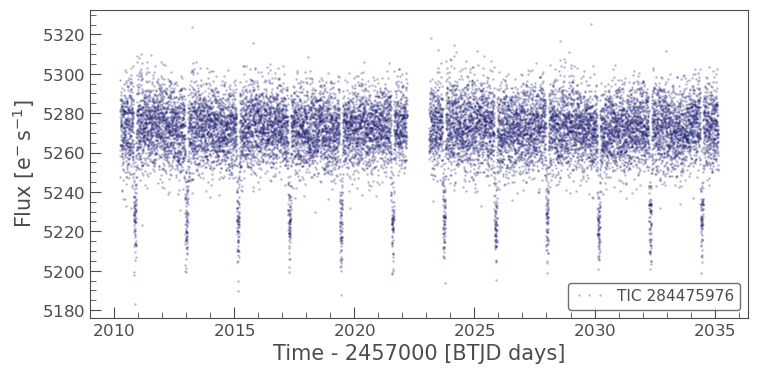

In [4]:
#plot the lightcurve to see what it looks like
lc = sector_data[1].download()
lc.plot(linewidth= 0, marker = '.', color = 'midnightblue', alpha = 0.2 )
plt.show()

The plot may look like this and the light curve might not that be obvious and require further processing.

**Normalization**
Involves adjusting the light curve data so that the variations in brightness are scaled relative to a baseline level, ie 1 or 0. This process makes it easier to compare different light curves and to identify patterns or anomalies

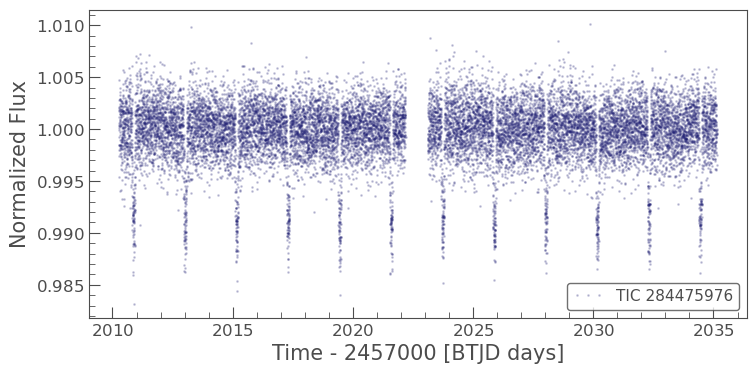

In [5]:
lc_norm = lc.normalize()
lc_norm.plot(linewidth= 0, marker = '.', color = 'midnightblue', alpha = 0.2 )
plt.show()

## 3. Manipulating the Light Curve

There are a set of useful functions in *Lightkurve* which you can use to work with the data. It can significantly improve the quality and interpretability of the data. These include:

- [flatten()](https://www.google.com/url?q=https%3A%2F%2Fdocs.lightkurve.org%2Freference%2Fapi%2Flightkurve.LightCurve.flatten.html%3Fhighlight%3Dflatten%23lightkurve.LightCurve.flatten): Flattening removes the low-frequency trend from the light curve using a Savitzky-Golay filter. This is useful for highlighting shorter-term variability.
- [remove_outliers()](https://www.google.com/url?q=https%3A%2F%2Fdocs.lightkurve.org%2Freference%2Fapi%2Flightkurve.LightCurve.remove_outliers.html%3Fhighlight%3Dremove_outliers):Outlier removal helps in cleaning the data by eliminating points that deviate significantly from the rest of the distribution.
- [remove_nans()](https://www.google.com/url?q=https%3A%2F%2Fdocs.lightkurve.org%2Freference%2Fapi%2Flightkurve.LightCurve.remove_nans.html%3Fhighlight%3Dremove_nans): Remove infinite or NaN values
- [fold()](https://www.google.com/url?q=https%3A%2F%2Fdocs.lightkurve.org%2Freference%2Fapi%2Flightkurve.LightCurve.fold.html%3Fhighlight%3Dfold): Fold the data at a particular period
- [bin()](https://www.google.com/url?q=https%3A%2F%2Fdocs.lightkurve.org%2Freference%2Fapi%2Flightkurve.LightCurve.bin.html%3Fhighlight%3Dbin): Reduce the time resolution of the array, taking the average value in each bin.

**Phase Folding**

Returns a Folded Light Curve object folded on a period and epoch. Used to find the transit in the data.

In phase folding you make periodic cuts and put these multiple transits on top of each other to build up more signal. The more data we have the better we can characterize the transit.


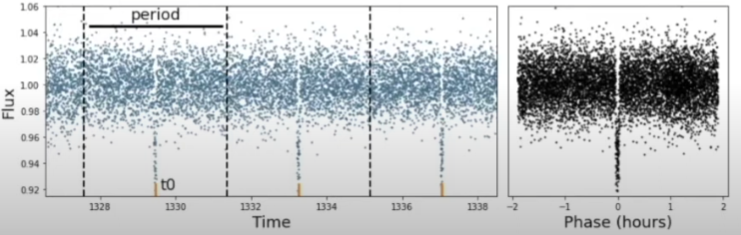

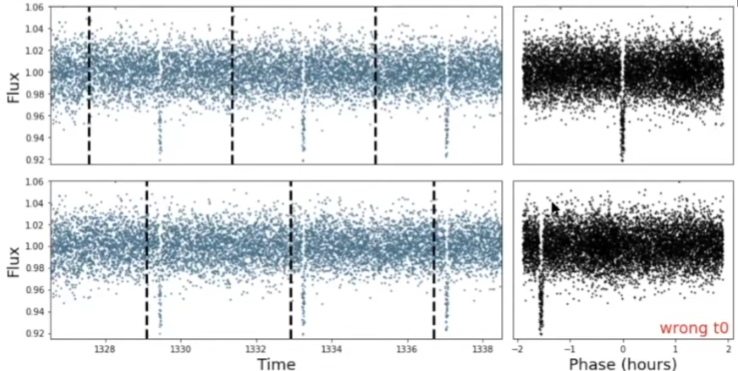

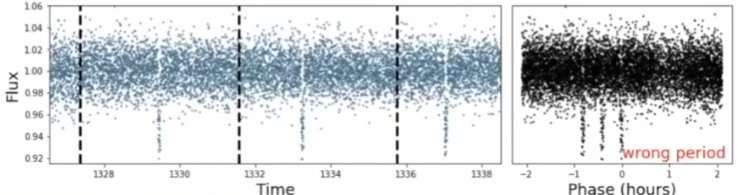

You can determine the epoch time and orbital period of the target from the [ExoFOP](https://exofop.ipac.caltech.edu/tess/target.php?id=284475976) website.

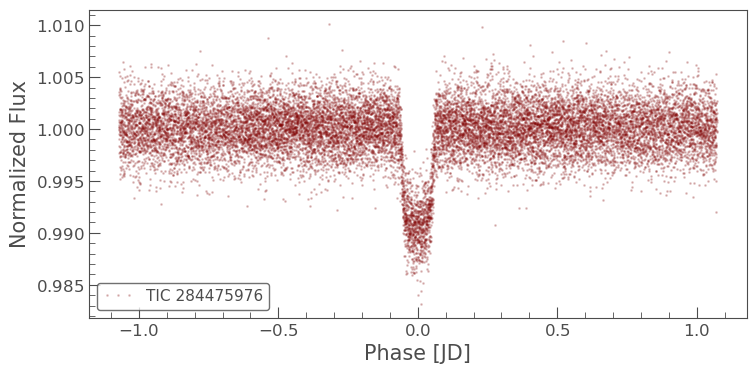

In [6]:
t0 = 2825.459527
period = 2.14363
lc_phased = lc_norm.fold(period = period, epoch_time = t0)
lc_phased.plot(linewidth =0, color = 'maroon', marker='.', alpha=0.2 )
plt.show()

**Binning**

Binnning in lightcurve plotting refers to the process of combining data points within a specified time interval to reduce noise and smooth out the data.

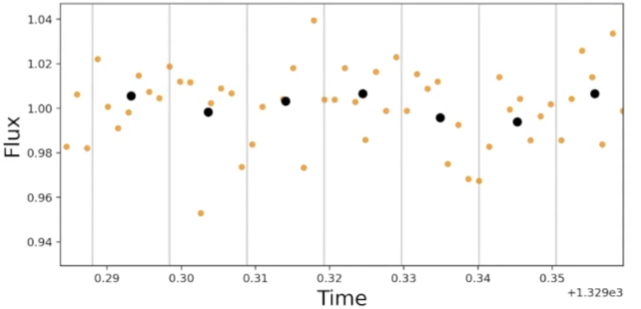

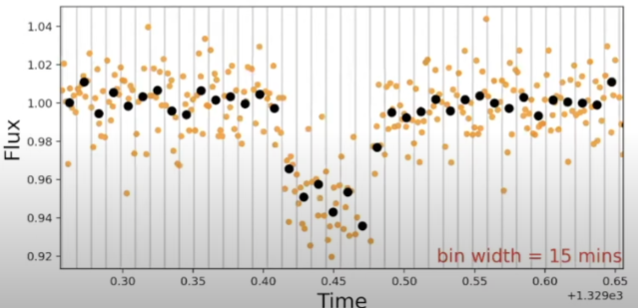

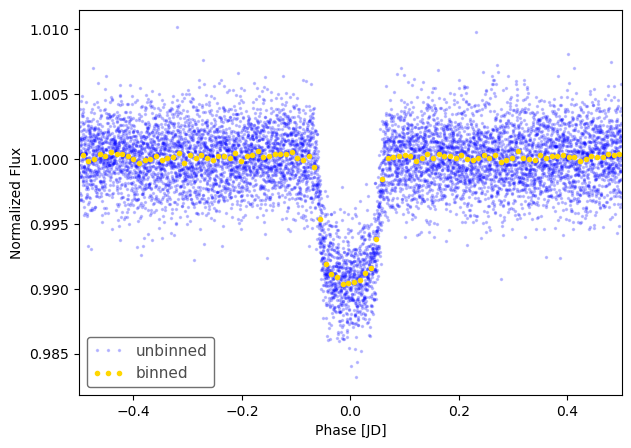

In [7]:
lc_phased_binned = lc_phased.bin (15/24/60) #bin width =15 mins. it has to be in terms of minutes when using Lightkurve
fig, ax = plt.subplots (figsize = (7,5))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'blue', alpha = 0.2, markersize = 3, label = "unbinned")
lc_phased_binned.plot(ax= ax, marker = 'o', linewidth= 0, color = 'gold', alpha = 1, markersize = 3, label = "binned")
plt.xlim(-0.5,0.5)
plt.show()

How to find the best TIC ID:
* [Exoplanet Archive TOI List](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=TOI)
* [TOI Catalog](https://tev.mit.edu/data/collection/193/)

Use TESS ExoFOP and other data sources to validate the information.

Try for Yourself!!

To dive deeper follow these links:
- [STScI TESS Workshop](https://github.com/spacetelescope/tessworkshop_tutorials/blob/master/lightkurve/workshop/Workshop.ipynb)
- [Lightkurve Tutorials](https://docs.lightkurve.org/tutorials/index.html)
- [STSci Data Search Tutorials](https://outerspace.stsci.edu/display/TESS/6.0+-+Data+Search+Tutorials)

In [50]:
TIC = 'TIC 366698929' #Confirmed Planet TOI 5512.01
#search what data is available for a given target
sector_data = lk.search_lightcurve(TIC)
sector_data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 46,2021,TESS-SPOC,600,366698929,0.0
1,TESS Sector 49,2022,TESS-SPOC,600,366698929,0.0
2,TESS Sector 46,2021,QLP,600,366698929,0.0
3,TESS Sector 49,2022,QLP,600,366698929,0.0


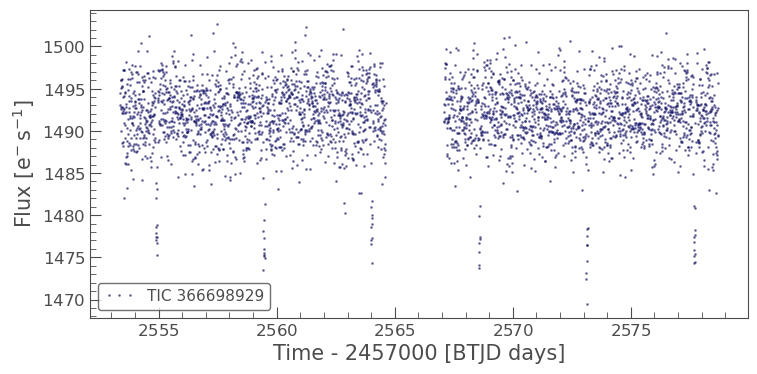

In [59]:
#plot the lightcurve to see what it looks like
lc = sector_data[0].download()
#flattening the lightcurve and removing outliers
lc.flatten(window_length=901).remove_outliers()
lc.plot(linewidth= 0, marker = '.', color = 'midnightblue', alpha = 0.5 )
plt.show()

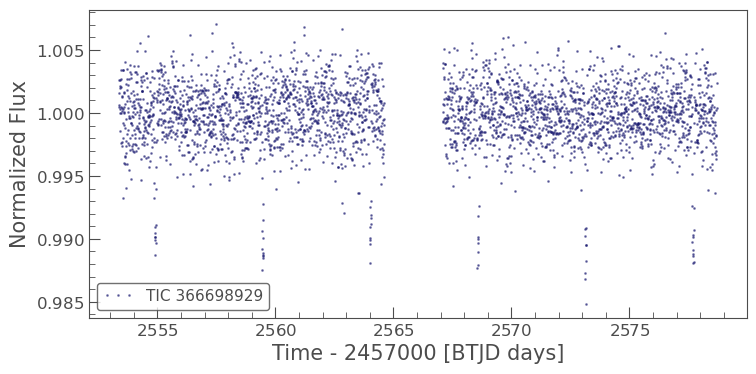

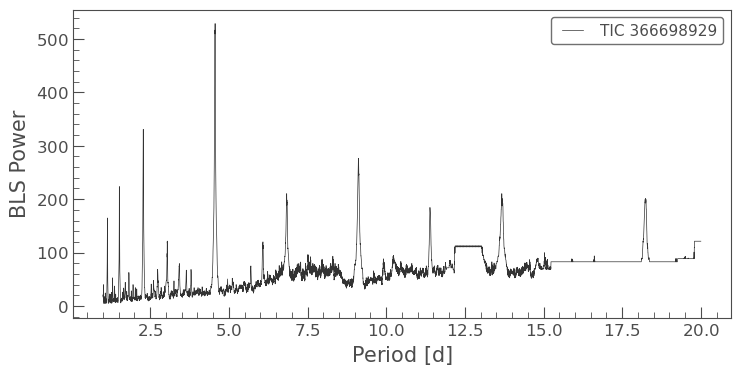

4.562856285628563 d
2554.8949323291945
0.05 d


In [60]:
#normalizing the light curve
lc_norm = lc.normalize()
lc_norm.plot(linewidth= 0, marker = '.', color = 'midnightblue', alpha = 0.5 )
plt.show()
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc_norm.to_periodogram(method='bls', period=period, frequency_factor=500)
bls.plot()
plt.show()
#get the most probable period, epoch and duration
planet_period = bls.period_at_max_power
planet_t0 = bls.transit_time_at_max_power
planet_dur = bls.duration_at_max_power

# Check the values
print(planet_period)
print(planet_t0)
print(planet_dur)

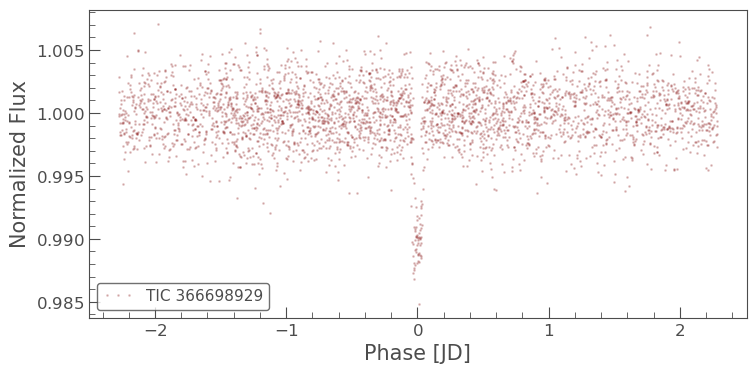

In [61]:
#folding the lightcurve
lc_phased = lc_norm.fold(period = planet_period, epoch_time = planet_t0)
lc_phased.plot(linewidth =0, color = 'maroon', marker='.', alpha=0.2 )
plt.show()

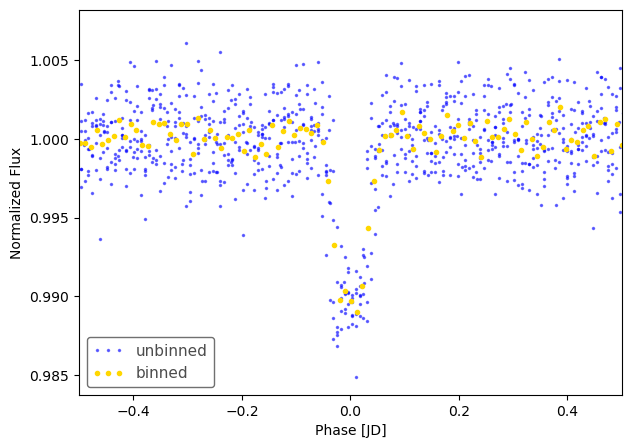

In [62]:
#binning the light curve
lc_phased_binned = lc_phased.bin (15/24/60) #bin width =15 mins. it has to be in terms of minutes when using Lightkurve
fig, ax = plt.subplots (figsize = (7,5))
lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'blue', alpha = 0.5, markersize = 3, label = "unbinned")
lc_phased_binned.plot(ax= ax, marker = 'o', linewidth= 0, color = 'gold', alpha = 1, markersize = 3, label = "binned")
plt.xlim(-0.5,0.5)
plt.show()

The lightcurve reduces the brightness of the star by ~1% and that's in line with the data readable on EXOfop of a ~10 Earth Radius. the extimated period and epoch are similar to those on EXOfop too.